#### Importando as lib, fazendo a carga da base 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:
target = pd.read_csv('TARGET.csv')
target = target.drop(columns=['Unnamed: 0'])
explicativa = pd.read_csv('EXP.csv', sep=';')

In [3]:
target.head(5)

,VL_MED_FAM
0,0
1,0
2,0
3,0
4,100


In [4]:
explicativa = explicativa.drop(columns=['Unnamed: 0'])
explicativa

,SEXO_RESP_M,UF_Bahia,UF_Ceará,UF_Maranhão,UF_Paraíba,UF_Pernambuco,UF_Piauí,UF_Rio_Grande_do_Norte,UF_Sergipe,MESORREGIAO_MES2,...,ENSINO_Nenhum,ENSINO_PréVestibulareSuperior,RENDAS_S,QTD_COMODO_DOMIC_FAM,QTD_DORM_FAM,QTD_PESSOA,QTD_MASC,RENDA_PROV_TRAB_REG,PERIODO_MAX_TRAB_MEMB,MEDIA_IDADE
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,5.0,2.0,1,1,0,0.0,32
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,4.0,2.0,4,2,0,0.0,27
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,4.0,1.0,1,0,0,0.0,35
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1.0,1.0,2,1,0,0.0,10
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,5.0,3.0,5,3,0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126249,1,1,0,0,0,0,0,0,0,0,...,0,0,0,6.0,3.0,1,1,0,0.0,66
126250,1,1,0,0,0,0,0,0,0,0,...,1,0,0,6.0,3.0,1,1,0,0.0,74
126251,1,1,0,0,0,0,0,0,0,0,...,0,0,0,3.0,2.0,2,1,0,0.0,67
126252,0,1,0,0,0,0,0,0,0,0,...,1,0,0,5.0,2.0,2,1,0,0.0,59


In [5]:
x_treino, x_teste, y_treino, y_teste = train_test_split (explicativa,
                                                         target,
                                                         test_size=0.3,
                                                         random_state=42)

x_treino.shape,x_teste.shape, y_treino.shape, y_teste.shape

((88377, 55), (37877, 55), (88377, 1), (37877, 1))

In [6]:
x_treino.columns

Index(['SEXO_RESP_M', 'UF_Bahia', 'UF_Ceará', 'UF_Maranhão', 'UF_Paraíba',
       'UF_Pernambuco', 'UF_Piauí', 'UF_Rio_Grande_do_Norte', 'UF_Sergipe',
       'MESORREGIAO_MES2', 'MESORREGIAO_MES3', 'MESORREGIAO_MES4',
       'MESORREGIAO_MES5', 'MESORREGIAO_MES6', 'MESORREGIAO_MES7',
       'MESORREGIAO_MES8', 'LOCAL_DOM_FAM_Urbana', 'MAT_PISO_FAMILIA_Cimento',
       'MAT_PISO_FAMILIA_Outro_Material', 'MATERIA_CONSTRUCAO_CAT_A',
       'AGUA_ENCANADA_Sim', 'ABASTECIMENTO_Demais',
       'ABASTECIMENTO_Rede_geral_de_distribuição', 'TEM_BANHEIRO_Sim',
       'ESCOAMENTO_SANITARIO_Fossa_séptica',
       'ESCOAMENTO_SANITARIO_Não_identificado',
       'ESCOAMENTO_SANITARIO_Outro_Meio',
       'ESCOAMENTO_SANITARIO_Rede_coletora_de_esgoto_ou_pluvial',
       'DESTINO_LIXO_É_coletado_diretamente',
       'DESTINO_LIXO_É_coletado_indiretamente',
       'DESTINO_LIXO_É_queimado_ou_enterrado_na_propriedade',
       'CALCAMENTO_Parcial', 'CALCAMENTO_Total', 'CLASSE_CIDADE_Outros',
       'CLASS

### Seleciona variável
##### procurando variáveis interessantes para o modelo 

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE #recursive feature eliminate
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [8]:
best_select = SelectKBest(chi2, k=5)
best_select.fit(explicativa, target)
chi_select = best_select.get_support()

In [9]:
rfe_sel =  RFE(estimator=LinearRegression(fit_intercept=True),
                   step=10,
                   n_features_to_select=5)
rfe_sel.fit(explicativa,target)
log_sel = rfe_sel.get_support()

In [10]:
rfr = SelectFromModel(RandomForestRegressor(random_state=42, n_estimators=100))
rfr_sel = rfr.fit(explicativa, target)
rfr_select = rfr_sel.get_support()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [11]:
chi_select, log_sel, rfr_select 

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True,  True,
         True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
         True, False,  True, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, 

In [12]:
col = explicativa.columns
col[chi_select], col[log_sel], col[rfr_select]

(Index(['TM_BF_1', 'RENDAS_S', 'RENDA_PROV_TRAB_REG', 'PERIODO_MAX_TRAB_MEMB',
        'MEDIA_IDADE'],
       dtype='object'),
 Index(['TEM_BANHEIRO_Sim', 'ESCOAMENTO_SANITARIO_Não_identificado', 'TM_BF_1',
        'ENSINO_Nenhum', 'RENDAS_S'],
       dtype='object'),
 Index(['TM_BF_1', 'RENDAS_S', 'QTD_PESSOA', 'RENDA_PROV_TRAB_REG',
        'PERIODO_MAX_TRAB_MEMB', 'MEDIA_IDADE'],
       dtype='object'))

## other 

In [13]:
var_sel = x_treino[['TM_BF_1',
'RENDAS_S',
'RENDA_PROV_TRAB_REG',
'PERIODO_MAX_TRAB_MEMB',
'MEDIA_IDADE',
'ENSINO_Medio',
'ENSINO_NAO_INFORMADO',
'ENSINO_Nenhum',
'ENSINO_PréVestibulareSuperior',
'QTD_PESSOA' ,
'MAT_PISO_FAMILIA_Cimento',
'MAT_PISO_FAMILIA_Outro_Material',]]

In [14]:
dtr = DecisionTreeRegressor(criterion='mae',max_depth=10
                           )

In [15]:
ft = dtr.fit(var_sel,y_treino)

In [16]:
ft.score(var_sel, y_treino)

0.8229010615354362

In [17]:
pred = ft.predict(var_sel)

In [18]:
dados = pd.DataFrame()
dados['pred'] = pred.tolist()
dados['real'] = y_treino.VL_MED_FAM.tolist()
dados['residuo'] = dados.real - dados.pred
dados.head()

,pred,real,residuo
0,0.0,0,0.0
1,954.0,477,-477.0
2,381.0,381,0.0
3,16.0,13,-3.0
4,954.0,954,0.0


In [19]:
var_test = x_teste[['TM_BF_1',
'RENDAS_S',
'RENDA_PROV_TRAB_REG',
'PERIODO_MAX_TRAB_MEMB',
'MEDIA_IDADE',
'ENSINO_Medio',
'ENSINO_NAO_INFORMADO',
'ENSINO_Nenhum',
'ENSINO_PréVestibulareSuperior',
'QTD_PESSOA' ,
'MAT_PISO_FAMILIA_Cimento',
'MAT_PISO_FAMILIA_Outro_Material',]]

In [20]:
predtst = ft.predict(var_test)

In [21]:
dadost = pd.DataFrame()
dadost['pred'] = predtst.tolist()
dadost['real'] = y_teste.VL_MED_FAM.tolist()
dadost['residuo'] = dadost.real - dadost.pred
dadost.head()

,pred,real,residuo
0,50.0,62,12.0
1,0.0,0,0.0
2,477.0,477,0.0
3,318.0,484,166.0
4,210.0,190,-20.0


### <font color=green> <strong> Metricas</strong> </font> 


In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_array
print(mean_absolute_error(dados.real,dados.pred),mean_absolute_error(dadost.real,dadost.pred))



59.40863573101599 62.139226971513054


In [23]:
print('{} , {}'.format(ft.score(var_sel,y_treino), ft.score(var_test, y_teste)))

0.8229010615354362 , 0.812996617006321


# Salvando

In [ ]:
import joblib


In [ ]:
joblib.dump(ft,
           'arvore.pkl',
            compress = 1)

In [ ]:

modelo_salvo = open('arvore.pkl','rb')
scoring = joblib.load(modelo_salvo)

In [ ]:
scoring.predict(var_test)

# residuo 

(array([6.0000e+00, 4.7600e+02, 2.2000e+01, 2.3600e+02, 1.6940e+03,
        4.0320e+03, 7.5754e+04, 2.7920e+03, 2.0910e+03, 3.0500e+02,
        2.4500e+02, 6.1100e+02, 4.1000e+01, 2.5000e+01, 2.0000e+01,
        1.9000e+01, 7.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1262.5  , -1066.275,  -870.05 ,  -673.825,  -477.6  ,  -281.375,
          -85.15 ,   111.075,   307.3  ,   503.525,   699.75 ,   895.975,
         1092.2  ,  1288.425,  1484.65 ,  1680.875,  1877.1  ,  2073.325,
         2269.55 ,  2465.775,  2662.   ]),
 <a list of 20 Patch objects>)

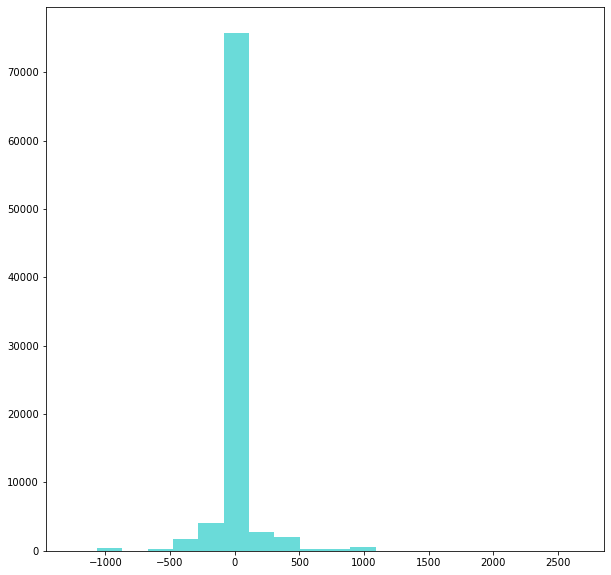

In [24]:
import matplotlib.pyplot as plt 
plt.subplots(1,1,figsize=(10,10))
plt.hist(dados.residuo, color='#6ADBD9', bins=20)
